<a href="https://colab.research.google.com/github/psaw/hse-ai24-ml/blob/main/PCA_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сжатие изображения без потери качества при помощи PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from scipy.stats import stats
from sklearn.decomposition import PCA

Загрузим картинку и нарисуем ее в монохромный формат

In [2]:
%%capture
!wget -O flower.png "https://www.dropbox.com/s/xoos0myk285efyu/flower.png?dl=0"

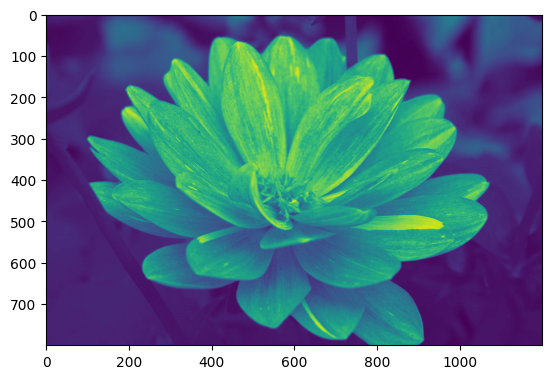

In [3]:
img = cv2.cvtColor(cv2.imread('flower.png'), cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

## Вопрос для Quiz

Какого размера картинка img? В ответе запишите общее число пикселей.

In [4]:
# ваш код здесь
print(img.shape)
print(img.size)

(800, 1200)
960000


Посмотрим на матрицу изображения

In [5]:
img

array([[16, 16, 16, ..., 10, 10, 10],
       [16, 16, 16, ..., 10, 10, 10],
       [16, 16, 16, ..., 10, 10, 10],
       ...,
       [19, 19, 19, ..., 10, 10, 10],
       [19, 19, 19, ..., 10, 10, 10],
       [19, 19, 19, ..., 10, 10, 10]], dtype=uint8)

### Сейчас будем делать PCA

**Задание.** Масштабируйте данные, поделив значения в матрице на 255

In [6]:
# Ваш код здесь
img = img / 255

**Задание.** Обучите PCA с 50-ю компонентами. Снизьте размерность.

In [7]:
# Ваш код здесь
pca = PCA(n_components=50, random_state=42)
pca.fit(img)
img_pca = pca.transform(img)
img_pca.shape


(800, 50)

## Вопрос для Quiz

Выведите на экран долю дисперсии, объясняемой первыми 50-ю главными компонентами. Ответ округлите до сотых.

In [8]:
# Ваш код здесь
print(f'{pca.explained_variance_ratio_.sum():.2f}')

0.99


**Задание.** Нарисуйте график, на котором отобразите долю дисперсии, объясняемой каждой из первых 50-ти компонент.

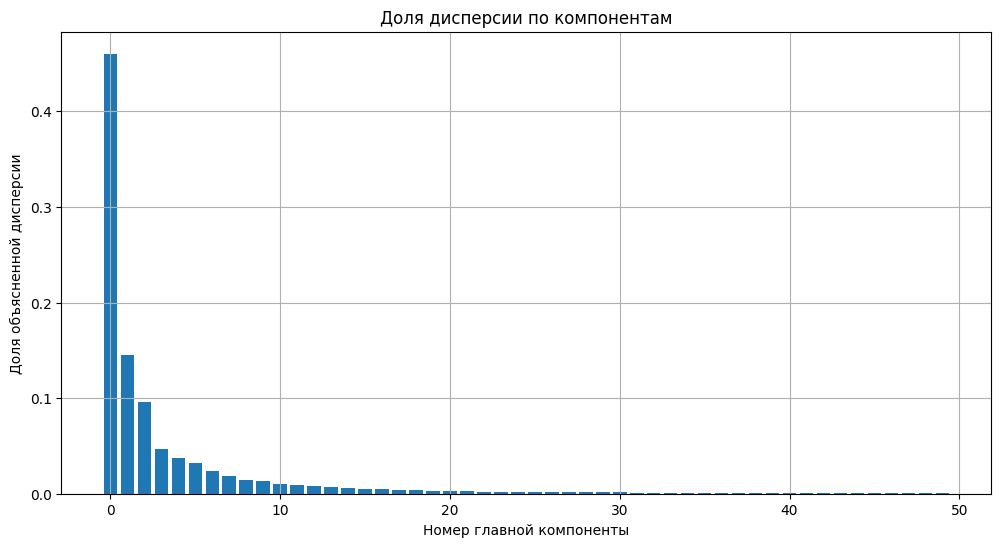

In [9]:
# Ваш код здесь
plt.figure(figsize=(12, 6))
plt.bar(range(50), pca.explained_variance_ratio_)
plt.xlabel('Номер главной компоненты')
plt.ylabel('Доля объясненной дисперсии')
plt.title('Доля дисперсии по компонентам')
plt.grid(True)
plt.show()


### Восстанавливаем изображение

**Задание.** Восстановите изображение, используя pca.inverse_transform.

In [10]:
# Ваш код здесь
img_restored = pca.inverse_transform(img_pca)

**Задание.** Нарисуйте рядом два изображения: исходное и восстановленное (по своим 50 компонентам).

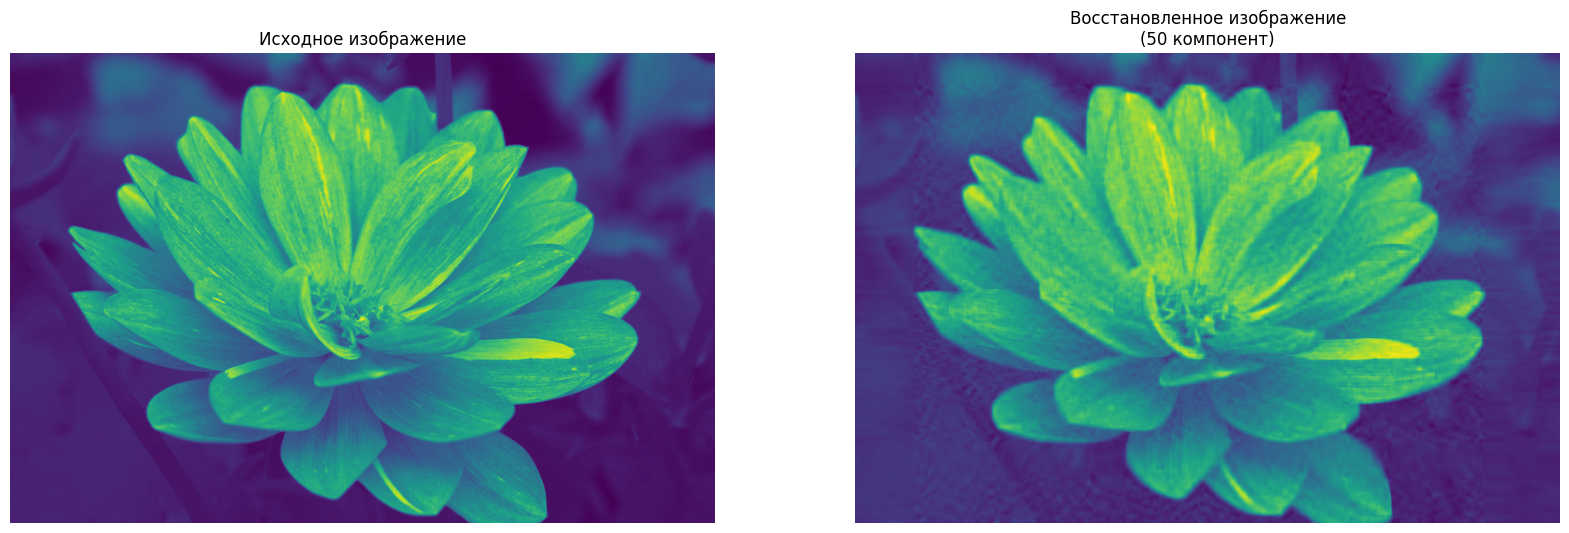

In [11]:
# Ваш код здесь
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(img)
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(122) 
plt.imshow(img_restored)
plt.title('Восстановленное изображение\n(50 компонент)')
plt.axis('off')
plt.show()


## Вопрос для Quiz

Упало ли визуально качество при сжатии изображения до 50 главных компонент?

## Вопрос для Quiz

Подберите минимальное количество компонент, при которых сжатое изображение визуально практически не отличается от исходного. Подбор происходит перебором, ориентируемся на визуальный результат.

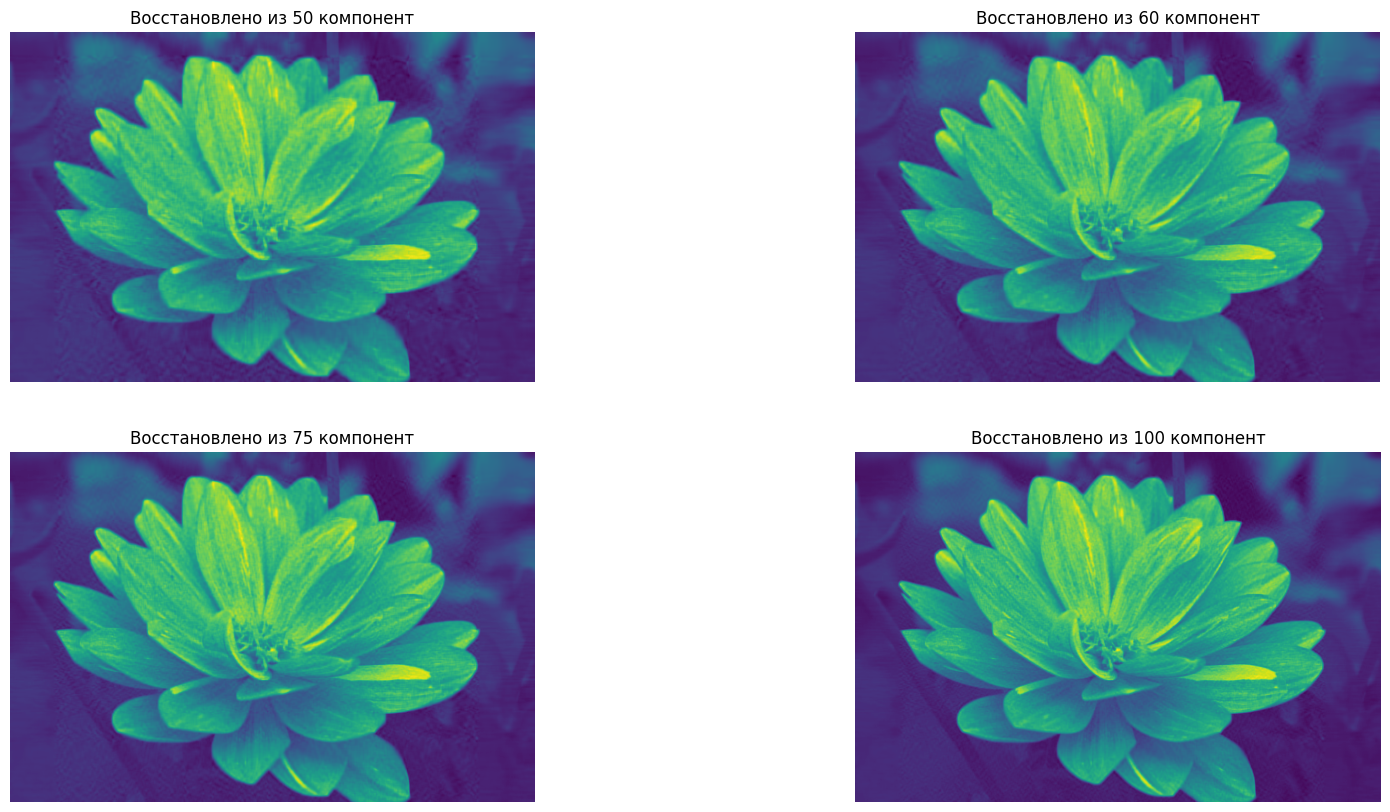

In [12]:
# Ваш код здесь
img_50 = img_restored

pca_60 = PCA(n_components=60, random_state=42)
pca_60.fit(img)
img_60 = pca_60.inverse_transform(pca_60.transform(img))

pca_75 = PCA(n_components=75, random_state=42)
pca_75.fit(img)
img_75 = pca_75.inverse_transform(pca_75.transform(img))

pca_100 = PCA(n_components=100, random_state=42)
pca_100.fit(img)
img_100 = pca_100.inverse_transform(pca_100.transform(img))

plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.imshow(img_50)
plt.title('Восстановлено из 50 компонент')
plt.axis('off')

plt.subplot(222)
plt.imshow(img_60)
plt.title('Восстановлено из 60 компонент')
plt.axis('off')

plt.subplot(223)
plt.imshow(img_75)
plt.title('Восстановлено из 75 компонент')
plt.axis('off')

plt.subplot(224)
plt.imshow(img_100)
plt.title('Восстановлено из 100 компонент')
plt.axis('off')

plt.show()

## Бонус

Попробуйте проделать все действия ноутбука, но уже с цветным изображением.

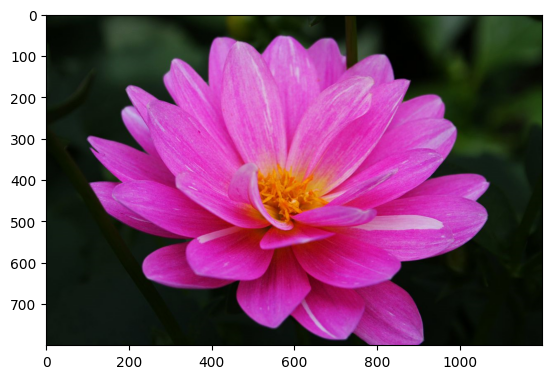

In [13]:
img = cv2.cvtColor(cv2.imread('flower.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

Отличия от предыдущих шагов заключаются в том, что цветное RGB-изображение состоит из трех каналов - это матрица яркостей красного, матрица яркостей зеленого и матрица яркостей синего цветов.

Номер канала - последняя размерность в объекте `img`.
Например, матрица яркости красного - это `img[:,:,0]`.

Все действия выше нужно проделать с каждым каналом в отдельности, а потом объединить преобразованные изображения для каждого канала - чтобы получить итоговую картинку со сниженной размерностью.

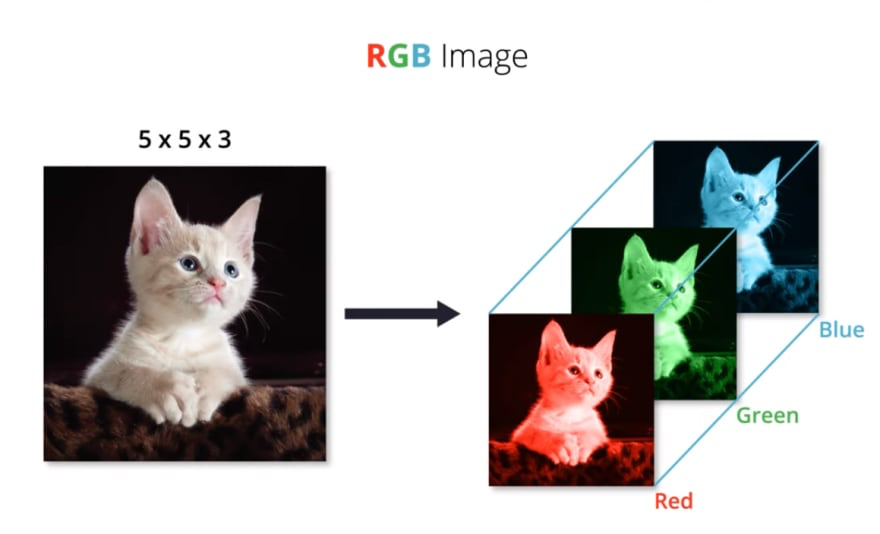

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.022996783975900825..1.0050042634618084].


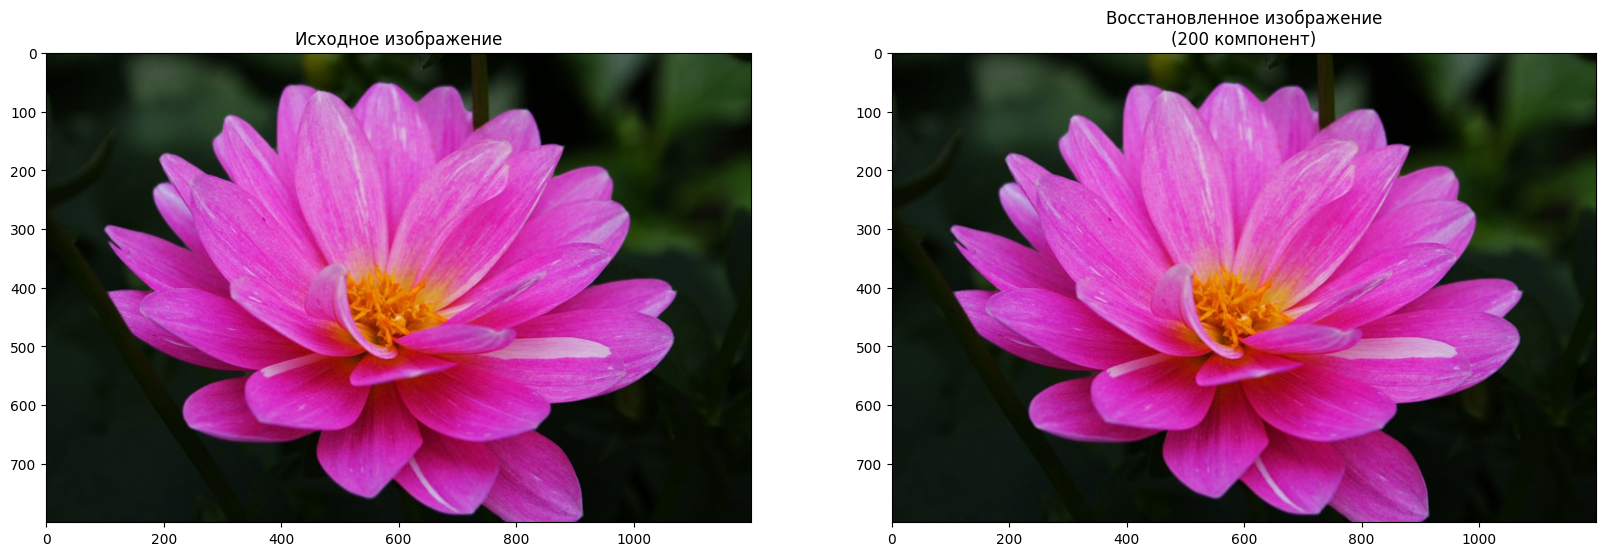

Доли объясненной дисперсии по каналам: {'Red': 0.9996069555225705, 'Green': 0.9984989709362745, 'Blue': 0.9996195870858827}


In [14]:
# ваш код здесь
# Нормализуем значения пикселей
img_normalized = img / 255.0

# Создаем массив для хранения преобразованных данных
n_components = 200  # Можно экспериментировать с этим значением
img_restored = np.zeros_like(img, dtype=float)
channels = ['Red', 'Green', 'Blue']
channel_var_ratio = dict(zip(channels,np.zeros(3)))

# Применяем PCA к каждому цветовому каналу
for channel in range(3):
    # Получаем текущий канал
    channel_data = img_normalized[:,:,channel]
    
    # Создаем и обучаем PCA
    pca = PCA(n_components=n_components, random_state=42)
    
    # Трансформируем данные и восстанавливаем их
    channel_transformed = pca.fit_transform(channel_data)
    channel_restored = pca.inverse_transform(channel_transformed)
    
    # Сохраняем восстановленный канал
    img_restored[:,:,channel] = channel_restored

    # Сохраняем долю объясненной дисперсии для каждого канала
    channel_var_ratio[channels[channel]] = pca.explained_variance_ratio_.sum()

# Визуализируем результаты
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.imshow(img_normalized)
plt.title('Исходное изображение')

plt.subplot(122)
plt.imshow(img_restored)
plt.title(f'Восстановленное изображение\n({n_components} компонент)')

plt.show()

print(f'Доли объясненной дисперсии по каналам: {channel_var_ratio}')

## Вопрос для Quiz

Найдите любое цветное изображение, которое вам нравится и снизьте его размерность, подберите минимальное число компонент, чтобы визуально не терять качество.

Вы можете снижать размерность для монохромного или для цветного изображения.

Результат - исходное изображение + его размеры, а также изображение после снижения размерности + число компонент.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.128487503483058..1.1008023418687432].


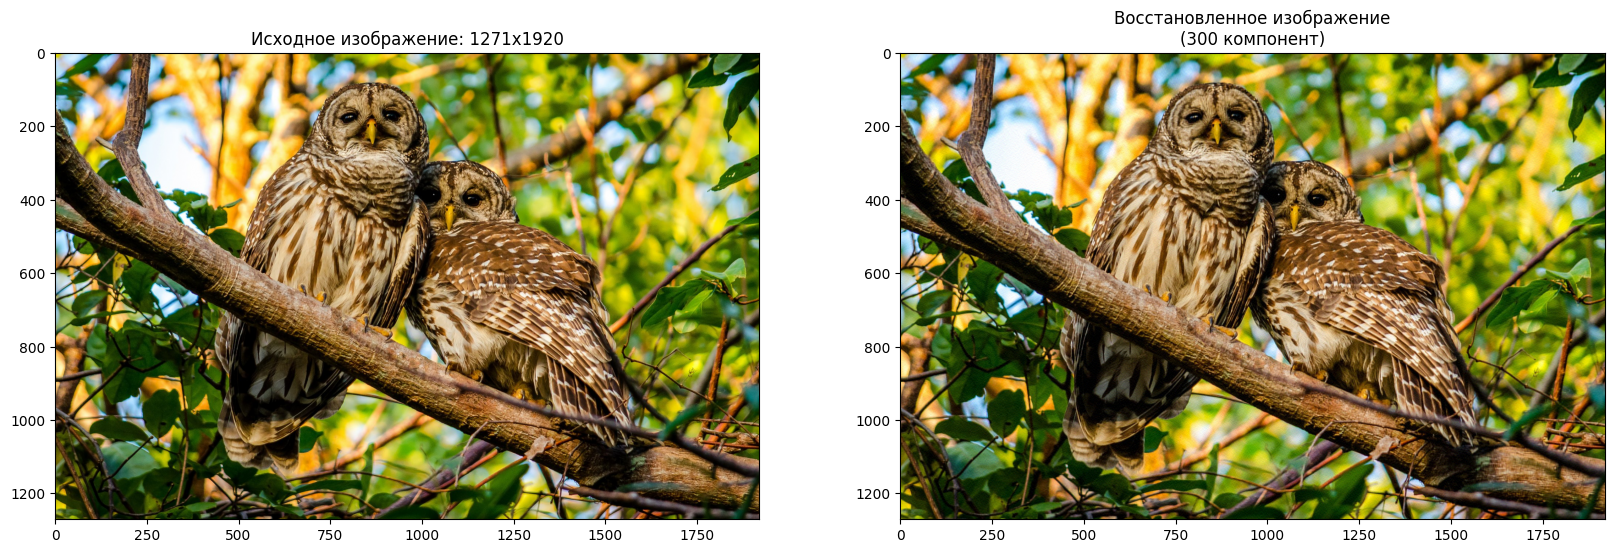

Доли объясненной дисперсии по каналам: {'Red': 0.9922958064716969, 'Green': 0.9903190658921581, 'Blue': 0.990733818557667}


In [15]:
# ваш код здесь
from urllib.request import urlopen
from PIL import Image

owls_url = 'https://raw.githubusercontent.com/Murcha1990/ML_AI24/3d3668cf697f4d5817f930604d86b45caf547e05/Hometasks/Base/Owls.jpg'
owls = Image.open(urlopen(owls_url))

# Преобразуем PIL Image в numpy array и нормализуем
img_normalized = np.array(owls) / 255.0

# Создаем массив для хранения преобразованных данных
n_components = 300  # Можно экспериментировать с этим значением
img_restored = np.zeros_like(img_normalized, dtype=float)
channels = ['Red', 'Green', 'Blue']
channel_var_ratio = dict(zip(channels,np.zeros(3)))

# Применяем PCA к каждому цветовому каналу
for channel in range(3):
    # Получаем текущий канал
    channel_data = img_normalized[:,:,channel]
    
    # Создаем и обучаем PCA
    pca = PCA(n_components=n_components, random_state=42)
    
    # Трансформируем данные и восстанавливаем их
    channel_transformed = pca.fit_transform(channel_data)
    channel_restored = pca.inverse_transform(channel_transformed)
    
    # Сохраняем восстановленный канал
    img_restored[:,:,channel] = channel_restored

    # Сохраняем долю объясненной дисперсии для каждого канала
    channel_var_ratio[channels[channel]] = pca.explained_variance_ratio_.sum()

# Визуализируем результаты
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.imshow(img_normalized)
plt.title(f'Исходное изображение: {img_normalized.shape[0]}x{img_normalized.shape[1]}')

plt.subplot(122)
plt.imshow(img_restored)
plt.title(f'Восстановленное изображение\n({n_components} компонент)')

plt.savefig('./owls_comparison.png', bbox_inches='tight', dpi=300)


plt.show()

print(f'Доли объясненной дисперсии по каналам: {channel_var_ratio}')
